# On Kepler 452

Kepler 452 is a solar-like star in the Kepler field that was [recently announced to possess a planet](http://iopscience.iop.org/1538-3881/150/2/56/article) with an orbit of 385 Earth days. Based on a stellar evolution model analysis of the host star, the planet is found to have a radius of approximately $1.63 \pm 0.23 R_{\oplus}$. [Standard Dartmouth stellar models](http://adsabs.harvard.edu/abs/2008ApJS..178...89D) were used to draw this conclusion, with added support from a similar analysis performed with [YREC models](http://dx.doi.org/10.1086/424966). While I do not doubt the overall validity of the stellar models, it is still a worthwhile excerise to explore how various modeling assumptions may affect the results given that only three observable properties were used to constrain the model parameters: $\log(g)$, $T_{\rm eff}$, and [Fe/H].

Being by initializing matplotlib and numpy (eventually I'll add this to the default config)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Solar Abundance Distribution

<Container object of 3 artists>

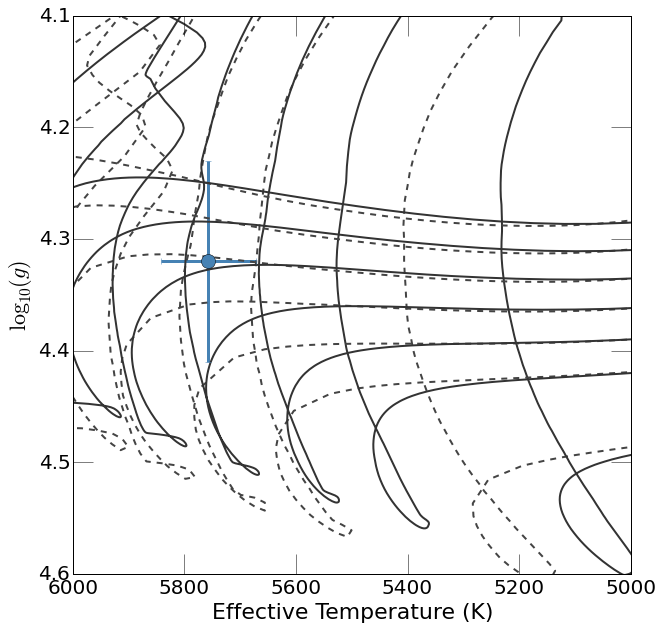

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# configure axes
ax.set_xlabel('Effective Temperature (K)', fontsize=22.)
ax.set_xlim(6000., 5000.)
ax.set_ylabel('$\log_{10}(g)$', fontsize=22.)
ax.set_ylim(4.6, 4.1)
ax.tick_params(axis='both', which='major', length=20., labelsize=20.)

# approximate mass range from measured temperature
masses = np.arange(0.90, 1.3, 0.05)

# directories for metallicity of +0.2 dex
f15_directory = '../../evolve/dmestar/trk/gas07/p020/a0/amlt2202'
d08_directory = '../../evolve/dsep08/trk/fehp02afep0'

# plot mass tracks for GS98 and GAS07 composition
for mass in masses:
    f15_file = '{:s}/m{:04.0f}_GAS07_p020_p0_y27_mlt2.202.trk'.format(f15_directory, mass*1000.)
    d08_file = '{:s}/m{:03.0f}fehp02afep0.jc2mass'.format(d08_directory, mass*100.)
    
    try:
        f15_trk = np.genfromtxt(f15_file)
        d08_trk = np.genfromtxt(d08_file)
    except IOError:
        continue
    
    ax.plot(10**d08_trk[:, 1], d08_trk[:, 2], '--', lw=2, color='#444444')
    ax.plot(10**f15_trk[:, 1], f15_trk[:, 2], '-', lw=2, color='#333333')

# add Kepler 452 point
ax.errorbar([5757.], [4.32], xerr=85., yerr=0.09, fmt='-o', lw=3, markersize=14., color='#4682B4')


Note that there is not an $0.95 M_{\odot}$ mass track plotted. The right-most track for both model sets is a $0.90 M_{\odot}$ track. Assuming the star is burning hydrogen in the core and is _not_ on the pre-main-sequence, then we can estimate a mass of approximately $1.03\pm0.03 M_{\odot}$ from the Dartmouth 2008 models (dashed lines). If we instead look at the Dartmouth 2015 models, we find the mass is approximately $1.08\pm0.03 M_{\odot}$, consistent with the first esimate, within $2\sigma$. Once one builds in the metallicity uncertainty, the errors increase further, providing a greater consistency between the two measurements. Jenkins et al. quote a mass of $1.04\pm0.05 M_{\odot}$, in agreement with the aforementioned values.

One small factor that was not accounted for is that the observed metallicity provides the _present day_ metallicity, which is not necessarily equivalent to the quote metallicity for model mass tracks. Due to gravitational settling and multiple diffusive processes, one may need to use models with a higher proto-stellar (re: initial) surface metal abundance to acheive a present day value of [Fe/H] $= +0.2$ dex. At most, we might expect an 0.1 dex reduction in the surface abundance of heavy element over time. Although this is very rough, it should provide an upper limit to the uncertainty one expects heavy element diffusion to inflict on model properties.

<Container object of 3 artists>

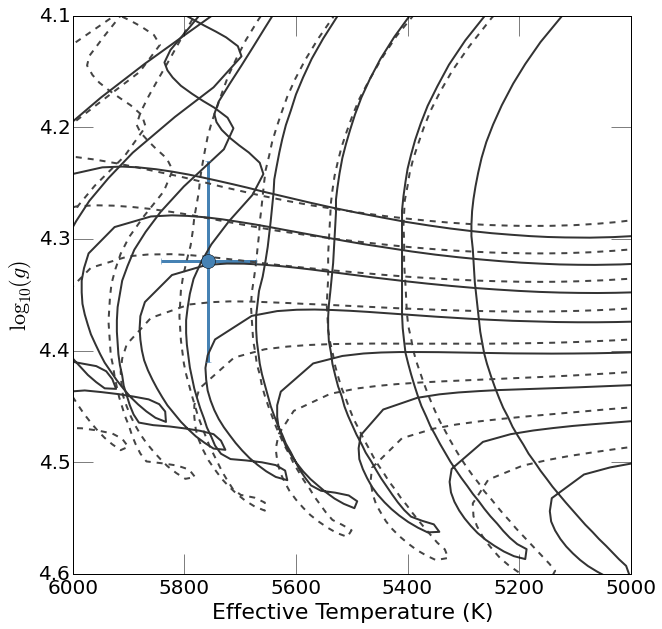

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# configure axes
ax.set_xlabel('Effective Temperature (K)', fontsize=22.)
ax.set_xlim(6000., 5000.)
ax.set_ylabel('$\log_{10}(g)$', fontsize=22.)
ax.set_ylim(4.6, 4.1)
ax.tick_params(axis='both', which='major', length=20., labelsize=20.)

# directories for metallicity of +0.2, +0.3 dex
d08_directory_03 = '../../evolve/dsep08/trk/fehp03afep0'

# plot mass tracks for GS98 and GAS07 composition
for mass in masses:
    d08_file = '{:s}/m{:03.0f}fehp02afep0.jc2mass'.format(d08_directory, mass*100.)
    d08_03_file = '{:s}/m{:03.0f}fehp03afep0.jc2mass'.format(d08_directory_03, mass*100.)
    
    try:
        d08_trk = np.genfromtxt(d08_file)
        d08_03_trk = np.genfromtxt(d08_03_file)
    except IOError:
        continue
    
    ax.plot(10**d08_trk[:, 1], d08_trk[:, 2], '--', lw=2, color='#444444')
    ax.plot(10**d08_03_trk[:, 1], d08_03_trk[:, 2], '-', lw=2, color='#333333')

# add Kepler 452 point
ax.errorbar([5757.], [4.32], xerr=85., yerr=0.09, fmt='-o', lw=3, markersize=14., color='#4682B4')

Dartmouth 2008 tracks with [Fe/H] $= +0.30$ dex are shown as solid lines, with dotted lines showing models computed with the present day metallicity of [Fe/H] = $+0.20$ dex. As was the case with the Dartmouth 2015 models, adopting a higher metallicity pushes the inferred stellar mass up to approximately $1.10 \pm 0.04 M_{\odot}$. 

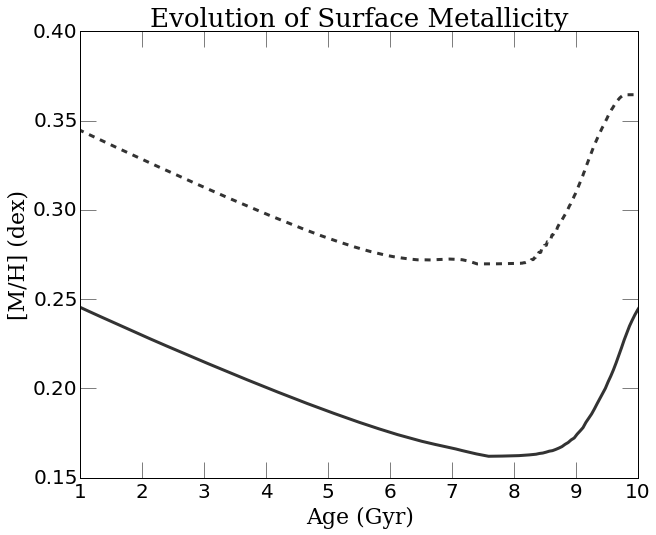

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.set_title('Evolution of Surface Metallicity', fontsize=26., family='serif')
ax.set_xlabel('Age (Gyr)', fontsize=22., family='serif')
ax.set_xlim(1.0, 10.0)
ax.set_ylabel('[M/H] (dex)', fontsize=22., family='serif')
ax.tick_params(axis='both', which='major', length=16., labelsize=20.)

f15_trk = np.genfromtxt('{:s}/m1100_GAS07_p020_p0_y27_mlt2.202.trk'.format(f15_directory))
d08_trk = np.genfromtxt('../../evolve/models/tmp/m1100_GS98_p020_p0_y29_mlt1.884.trk')

# solar Z/X = 0.0165 for GAS07 solar abundance distribution, 0.0231 for GS98
ax.plot(f15_trk[:,0]/1.0e9, np.log10(f15_trk[:,7]/0.0165), '-', lw=3, color="#333333")
ax.plot(d08_trk[:,0]/1.0e9, np.log10(d08_trk[:,7]/0.0231), '--', lw=3, color="#333333")

Clearly a metallicity 0.1 dex above the quoted value is not a reasonable estimate, as it never dips as low as 0.2 dex. An initial metallicity in excess of 0.2 dex would be needed to derive precisely 0.2 dex as the present day metallicity for Kepler 452, but this is well within the uncertainty limits of ±0.08 dex derived from spectroscopy. While there may be a slight preference among all models for a higher mass than $1.04 M_{\odot}$, it is a valid estimate. 

How does a 5% change in mass affect the radius and luminosity evolution of the star? If we take the gravity to be constant regardless of the derived mass, we can compute the fractional change in radius introduced by a change in mass,

\begin{equation}
    \frac{R_{\star}}{R_{\star,0}} = \left(\frac{M_{\star}}{M_{\star,0}}\right)^{1/2}.
\end{equation}

Therefore, a 5% change in stellar mass introduces a 3% increase on the stellar radius. However, since the planet radius is proportional to the projected surface area of the host star, the planet radius increases by approximately 5%, as well. The planet would therefore have a radius of $R_p = 1.71 R_{\oplus}$, which is entirely consistent with the Jenkins et al. estimate. This would further confirm the analysis of Jenkins et al. that lead to the conclusion that _it is unlikely that Kepler 452b has an Earth-like composition_. 

The luminosity evolution would also be impacted by the increased radius, for at constant temperature, the luminosity of the star will increase by a factor proportional to $R_{\star}^2$. A 5% increase of indicdent flux is extremely minor in the grand scheme of things.

Indeed, even if the star were young, the mass estimate would increase by approximately 10% - 15%. This would increase the estimated planet radius by an equivalent amount, leading to a final planet mass $R_p = 2.0 R_{\oplus}$, which would still place the object in the super-Earth category. Although it would mean that the planet is even less likely to be rocky.